#TP Marches Aléatoire
Nom: AZIZ
Prénom: Rezak
Groupe: SIQ3

#TP0
Considérons une marche aléatoire avec 10 états {0, 1, 2, ..., 10} qui se termine
lorsque 0 ou 10 est atteint. Les états 0 et 10 seraient des états absorbants.

---

simuler la marche aléatoire et estimez la probabilité que la marche aléatoire
se termine à l’état 0 pour l’état initial "a" donné et la probabilité p d’un pas vers
la droite.

In [ ]:
import random as rn
def simulerMA(etatInitial,p):
  X=etatInitial
  listeEtat=[X]
  while X!=0 and X!=10:
    u=rn.uniform(0,1)
    if u<p:
      X+=1
      listeEtat.append(X)
    else:
      X-=1
      listeEtat.append(X)
  return listeEtat

def estimerProba0(etatInitial,p,n):
  n0=0
  for i in range(n):
    listeEtat=simulerMA(etatInitial,p)
    if listeEtat[len(listeEtat)-1]==0:
      n0+=1
  return n0/n

print("Probabilité que la MA se termine à l'etat 0 partant de 5 et d'une proba de 0.4 de partir à droite",estimerProba0(5,0.4,1000000))

Probabilité que la MA se termine à l'etat 0 partant de 5 et d'une proba de 0.4 de partir à droite 0.883814


#TP1
Soit τ la variable aléatoire du premier retour en 0.
$$P (τ = 2k) = P (S_1 \neq 0, S_2\neq  0, .., S_{2k−1}\neq  0, S_{2k} = 0) = \frac{1}{2k-1}\frac{1}{2^{2k}}C^k_{2k}$$



Tracer l’ histogramme de cette distribution et la fonction de répartition. Commentez

(0.0, 0.9905367809450062)

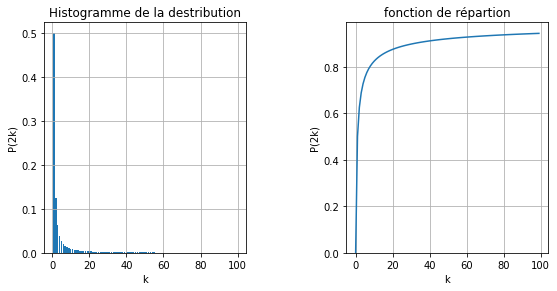

In [ ]:
#tracez l'histogrammer et la fonctin de répartition
import math
import numpy as np
import matplotlib.pyplot as plt
def nCr(n,r):
  return math.factorial(n)/(math.factorial(r)*math.factorial(n-r))

def proba_retour0(k):
  if k==0:
    return 1
  comb=nCr(2*k,k)
  return (comb/(2*k-1))/2**(2*k)

def fonction_repartition(k_array):
  cumu=[0]
  for i in range(len(k_array)):
    cumu.append(cumu[i]+k_array[i])
  return cumu
x1=[i for i in range(1,100)]
k_array=[proba_retour0(k) for k in range(1,100)]
x2=[i for i in range(100)]
cumu=fonction_repartition(k_array)



plt.figure(1,figsize=(5,8))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.5, right = 1.5,top = 0.9, wspace = 0.5, hspace = 0)


plt.subplot(1,2,1)
plt.bar(x1,k_array)
plt.title('Histogramme de la destribution')
plt.grid()
plt.xlabel('k')
plt.ylabel('P(2k)')
plt.ylim(0)

plt.subplot(1,2,2)
plt.plot(x2,cumu)
plt.title('fonction de répartion')
plt.grid()
plt.xlabel('k')
plt.ylabel('P(2k)')
plt.ylim(0)


**Commentaire**
On remarque que la probabilité de premier retour vers l'orgine tend vers 0 en augmentant la longueur de chemin. Cela peut etre justifié par le fait que le nombre totale de trajectoires se multiplié par 2 a chaque fois qu'on ajoute un pas. cependant cette probabilité n'est pas nulle (sauf à l'infini). la meme remarque peut se traduire par la fonction de répartition qui suit une allure logarithmique mais celle ci tends vers une borne qui est 1. 

##TP2
Etude de la loi de l’arcsinus, sur le dernier retour à 0 Soit Sn une marche
aléatoire symétrique, faire plusieurs simulations longues de marches aléatoires et
visualiser la fonction n → Sn, pour constater que la marche aléatoire a tendance
à s’éloigner de 0 pour de longues périodes et qu’il assez probable qu’une marche
partant de 0 ne revienne qu’après un temps assez long.

La probabilité theorique de dernier retour:  0.5000000000000001
La probabilité simulé de dernier retour:  0.498


Visualisation d'une simulation:




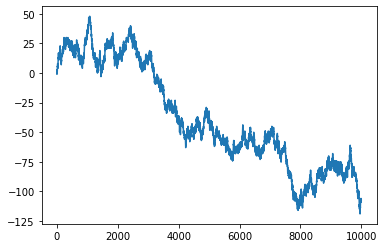

In [ ]:
def simulerMALongue(etatInitial,p,n):
  X=etatInitial
  dernierRetour0=0
  listeEtat=[X]
  for i in range(1,n):
    u=rn.uniform(0,1)
    if u<p:
      X+=1
      listeEtat.append(X)
    else:
      X-=1
      listeEtat.append(X)
    if X==0:
      dernierRetour0=i
  return listeEtat,dernierRetour0

def proba_dernier_retour_Theorique(t):
  return (2/math.pi)*math.asin(math.sqrt(t))




def proba_dernier_retour_Simulation(t,DernierRetourTab,Nb_simulation,Nb_pas):
  x=[i for i in range(Nb_pas)]
  n=0
  for i in range(Nb_simulation):
    if DernierRetourTab[i]<t*Nb_pas:
      n+=1
  return n/Nb_simulation

def simulation_n_MA(Nb_simulation,Nb_pas):
  DernierRetourTab=[]
  for i in range(Nb_simulation):
    M,dernier=simulerMALongue(0,1/2,Nb_pas)
    #plt.plot(x,M)
    DernierRetourTab.append(dernier)
  return DernierRetourTab


Nb_simulation=1000
Nb_pas=10000
t=0.5
DernierRetourTab=simulation_n_MA(Nb_simulation,Nb_pas)
proba_theorique=proba_dernier_retour(t)
proba_simulation=proba_dernier_retour_Simulation(t,DernierRetourTab,Nb_simulation,Nb_pas)

print("La probabilité theorique de dernier retour: ",proba_theorique)
print("La probabilité simulé de dernier retour: ",proba_simulation)

print("\n\nVisualisation d'une simulation:\n\n")
M,dernier=simulerMALongue(0,1/2,Nb_pas)
plt.plot(x,M)

##Commentaire:
Dans les résultats précédant, Nous avons fait plusieurs simulation sur des marches aléatoires longues. Nous avons ensuite simulé la probabilité de dernier retour en 0 pour la comparer à la valeur théorique calculé par la loi arcsin. De plus nous avons visualiser les résultats.

---
Nous remarquons donc que la probabillité simulé et la proba théorique sont plus ou moins equivalente. De plus, On remarque que la marche aléatoire a tendance à s'eloigner de 0 pour de longue periode en effet en calculant et en simulant la proba de dernier retour on remarque que la probabilité que le dernier retour en 0 aie lieu dans le premier quart est de 0.33 donc dans 33% des cas la marche aleatoire ne retourne pas vers 0 pour de longue periode. et dans le reste 67% des cas la marche reviennent à dans les 3 quarts restant ce qui indiquent qu’il assez probable qu’une marche partant de 0 ne revienne qu’après un temps assez long. La meme chose est remarqué visualement à travers le graphe précedent.


